In [1]:
import semicon

# load parameters as dataframe

In [2]:
semicon.parameters.load_as_df('winkler')

,E_0,Delta_0,P,m_c,gamma_1,gamma_2,gamma_3,g_c,kappa,q
InAs,0.418,0.380,0.9197,0.0229,20.40,8.30,9.10,-14.900,7.60,0.39
AlSb,2.384,0.673,0.8463,0.1200,4.15,1.01,1.71,0.843,0.31,0.07
InSb,0.237,0.810,0.9641,0.0139,37.10,16.50,17.70,-51.560,15.60,0.39
Ge,NaN,0.296,NaN,NaN,13.38,4.24,5.69,NaN,3.41,0.06


In [3]:
semicon.parameters.load_as_df('lawaetz')

,E_0,Delta_0,P,m_c,gamma_1,gamma_2,gamma_3,g_c,kappa,q
AlSb,2.300,0.75,0.8441,0.180,4.15,1.01,1.75,0.52,0.31,0.07
GaSb,0.810,0.77,0.9238,0.045,11.80,4.03,5.26,-7.12,3.18,0.13
InAs,0.420,0.38,0.9197,0.023,19.67,8.37,9.29,-14.80,7.68,0.04
HgTe,-0.303,1.00,0.8281,-0.031,-18.68,-10.19,-9.56,59.00,-10.85,0.06
CdTe,1.600,0.91,0.8881,0.096,5.29,1.89,2.46,-1.12,1.27,0.05


# Load raw parameters (as used by other functions)

In [4]:
semicon.parameters.load_params('winkler')

{'InAs': {'E_0': 0.418,
  'Delta_0': 0.38,
  'P': 0.9197,
  'm_c': 0.0229,
  'g_c': -14.9,
  'gamma_1': 20.4,
  'gamma_2': 8.3,
  'gamma_3': 9.1,
  'kappa': 7.6,
  'q': 0.39},
 'AlSb': {'E_0': 2.384,
  'Delta_0': 0.673,
  'P': 0.8463,
  'm_c': 0.12,
  'g_c': 0.843,
  'gamma_1': 4.15,
  'gamma_2': 1.01,
  'gamma_3': 1.71,
  'kappa': 0.31,
  'q': 0.07},
 'InSb': {'E_0': 0.237,
  'Delta_0': 0.81,
  'P': 0.9641,
  'm_c': 0.0139,
  'g_c': -51.56,
  'gamma_1': 37.1,
  'gamma_2': 16.5,
  'gamma_3': 17.7,
  'kappa': 15.6,
  'q': 0.39},
 'Ge': {'E_0': None,
  'Delta_0': 0.296,
  'P': None,
  'm_c': None,
  'g_c': None,
  'gamma_1': 13.38,
  'gamma_2': 4.24,
  'gamma_3': 5.69,
  'kappa': 3.41,
  'q': 0.06}}

# bulk parameters

## original parametres show spurious solutions

In [5]:
p = semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
)

{k: p[k] for k in sorted(p)}

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.9197,
 'g_c': 1.938729840711197,
 'gamma_0': -1.0115210754829587,
 'gamma_1': 2.050284378198743,
 'gamma_2': -0.43985781090063014,
 'gamma_3': 0.4801421890993698,
 'kappa': -1.1298578109006296,
 'q': 0.04}

## that can be avoid by renormalizing $P$ in a way that $\gamma_0=1$

In [6]:
p = semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
    new_gamma_0=1,
)

{k: p[k] for k in sorted(p)}

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.898668277801977,
 'g_c': 1.181919931123545,
 'gamma_0': 1,
 'gamma_1': 2.8469263882910063,
 'gamma_2': -0.04153680585449848,
 'gamma_3': 0.8784631941455014,
 'kappa': -0.731536805854498,
 'q': 0.04}

## One can also set $P$ to desire value

In [7]:
p = semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
    new_P=0.89866827769558988,
)

{k: p[k] for k in sorted(p)}

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.8986682776955899,
 'g_c': 1.1819199273395675,
 'gamma_0': 1.0000000100574233,
 'gamma_1': 2.846926392274142,
 'gamma_2': -0.04153680386293068,
 'gamma_3': 0.8784631961370692,
 'kappa': -0.7315368038629302,
 'q': 0.04}

# 2DEG parameters

In [8]:
%matplotlib inline

In [9]:
grid_spacing = 0.5
widths = [5, 12.5, 5, 5]
gamma_0 = 1.0

AlSb = semicon.parameters.bulk('lawaetz', 'AlSb', gamma_0, valence_band_offset=.18)
InAs = semicon.parameters.bulk('lawaetz', 'InAs', gamma_0)
GaSb = semicon.parameters.bulk('lawaetz', 'GaSb', gamma_0, valence_band_offset=.56)

two_deg_params, walls = semicon.parameters.two_deg(
    parameters = [AlSb, InAs, GaSb, AlSb],
    widths = widths,
    grid_spacing=grid_spacing,
    extra_constants={'hbar': 1, 'e': 1},
)

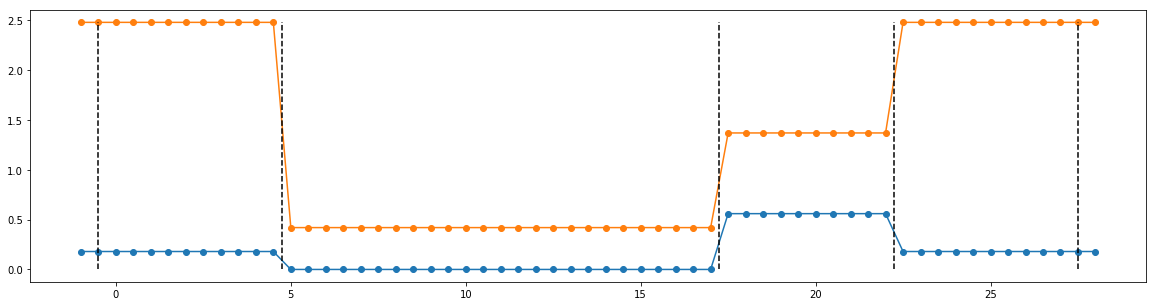

In [10]:
import numpy as np

xpos = np.arange(- 2 * grid_spacing, sum(widths) + 2 * grid_spacing, 0.5)
semicon.parameters.plot_2deg_bandedges(two_deg_params, xpos, walls);

# Provide parameters by hand

In [11]:
# parmaters is dictionary where key is name and val a dict of parameters
# using load_params simulate value that could be provided by user
parameters = semicon.parameters.load_params('lawaetz')

inp_AlSb = semicon.parameters.bulk(parameters, 'AlSb', gamma_0, valence_band_offset=.18)
inp_InAs = semicon.parameters.bulk(parameters, 'InAs', gamma_0)
inp_GaSb = semicon.parameters.bulk(parameters, 'GaSb', gamma_0, valence_band_offset=.56)

assert all([AlSb == inp_AlSb, InAs == inp_InAs, GaSb == inp_GaSb])

In [12]:
# parmaters is dictionary where key is name and val a dict of parameters
# using load_params simulate value that could be provided by user
parameters = semicon.parameters.load_params('lawaetz')

inp_AlSb = semicon.parameters.bulk(parameters['AlSb'], new_gamma_0=gamma_0, valence_band_offset=.18)
inp_InAs = semicon.parameters.bulk(parameters['InAs'], new_gamma_0=gamma_0)
inp_GaSb = semicon.parameters.bulk(parameters['GaSb'], new_gamma_0=gamma_0, valence_band_offset=.56)

assert all([AlSb == inp_AlSb, InAs == inp_InAs, GaSb == inp_GaSb])